In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import cv2
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    lambda x: (x > 0.5).float() * -1 + 1
])

train_data = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)

0it [00:00, ?it/s]

469it [00:17, 26.73it/s]


Epoch 1, Loss: 137.0153873860836


469it [00:18, 25.47it/s]


Epoch 2, Loss: 39.51862327288836


469it [00:17, 26.61it/s]


Epoch 3, Loss: 28.95074388757348


469it [00:17, 26.82it/s]


Epoch 4, Loss: 24.342550200293772


469it [00:17, 26.82it/s]


Epoch 5, Loss: 20.833946274360642


469it [00:17, 26.80it/s]


Epoch 6, Loss: 17.995288881123997


469it [00:17, 26.74it/s]


Epoch 7, Loss: 15.374295847956091


469it [00:17, 26.85it/s]


Epoch 8, Loss: 13.48226063977927


469it [00:17, 26.84it/s]


Epoch 9, Loss: 11.454530392540619


469it [00:17, 26.25it/s]

Epoch 10, Loss: 10.390981773263775


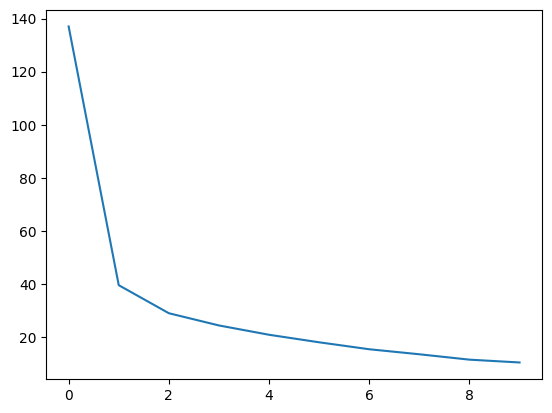

In [3]:
class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()

        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)

        self.fc = nn.Linear(64 * 7 * 7, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.pool(x)

        x = x.view(-1, 64 * 7 * 7)
        x = self.fc(x)
        return x

    
model = CNNClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

losses = []
for epoch in range(10):
    epoch_loss = 0
    for i, (X, y) in tqdm(enumerate(train_loader)):
        optimizer.zero_grad()
        y_pred = model(X)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {epoch_loss}")
    losses.append(epoch_loss)

plt.plot(losses)
plt.show()

In [4]:
model.eval()

test_data = datasets.MNIST(root="./data", train=False, transform=transform, download=True)

correct = 0
total = 0

for i, (X, y) in enumerate(DataLoader(test_data, batch_size=128)):
    y_pred = model(X)
    correct += (y_pred.argmax(1) == y).sum().item()
    total += y.size(0)    

print(f"Accuracy: {correct/total*100:.2f}%")

Accuracy: 98.46%


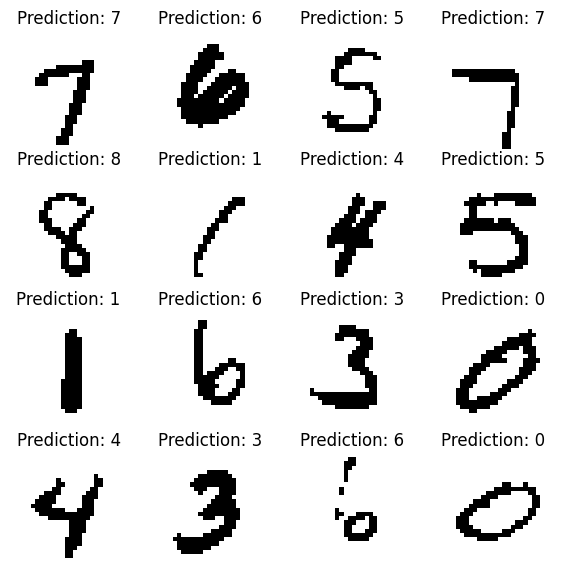

In [5]:
plt.figure(figsize=(7, 7))
for i in range(16):
    idx = random.randint(0, len(test_data))

    X = test_data[idx][0].unsqueeze(0)
    y = test_data[idx][1]

    y_pred = model(X)

    plt.subplot(4, 4, i+1)

    plt.imshow(X.squeeze().numpy(), cmap="gray")
    plt.title(f"Prediction: {y_pred.argmax(1).item()}")
    plt.axis("off")
plt.show()

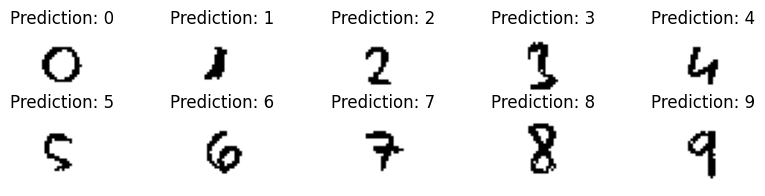

In [7]:
plt.figure(figsize=(10, 2))

for i in range(10):
    img = cv2.imread(f"img/{i}.png", cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)[1]
    img = cv2.bitwise_not(img)
    img = torch.tensor(img).float().unsqueeze(0).unsqueeze(0) / 255

    y_pred = model(img)

    plt.subplot(2, 5, i+1)
    plt.imshow(img.squeeze().numpy(), cmap="gray")
    plt.title(f"Prediction: {y_pred.argmax(1).item()}")
    plt.axis("off")
plt.show()